In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [2]:
# load data_set
iris = datasets.load_iris()

# extract x & y of 2 classes only
features = iris.data[:100, :]
target = iris.target[:100]

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [3]:
# classification for train data
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
transformed_x_train = lda.transform(x_train)
transformed_x_test = lda.transform(x_test)

In [4]:
# print coefficients
weights = pd.DataFrame(np.concatenate([lda.coef_[0], lda.intercept_]), index=iris.feature_names + ['intercept'])
display(weights)

,0
sepal length (cm),-0.839159
sepal width (cm),-18.665881
petal length (cm),21.403739
petal width (cm),32.409952
intercept,-23.494212


(array([0.36651514, 0.27488636, 0.27488636, 0.09162879, 0.27488636]),
 array([4.67410081, 5.45364374, 6.23318666, 7.01272958, 7.7922725 ,
        8.57181542]),
 <BarContainer object of 5 artists>)

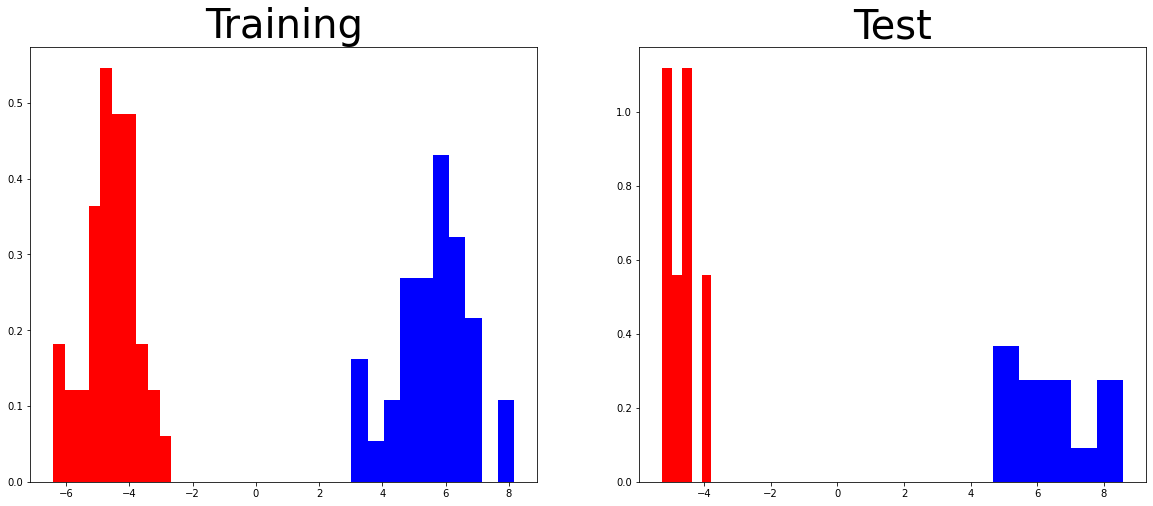

In [5]:
# plot training data
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.set_title("Training", fontsize=40)
axL.hist(transformed_x_train[np.where(transformed_x_train < 0)], density=True, bins=10, color='red')
axL.hist(transformed_x_train[np.where(transformed_x_train > 0)], density=True, bins=10, color='blue')

# plot test data
axR.set_title("Test", fontsize=40)
axR.hist(transformed_x_test[np.where(transformed_x_test < 0)], bins=5, density=True, color='red')
axR.hist(transformed_x_test[np.where(transformed_x_test > 0)], bins=5, density=True, color='blue')

In [6]:
# get accuracy
accuracy = lda.score(x_test, y_test)
print(f"accuracy is {accuracy}")

accuracy is 1.0
